In [1]:
%load_ext autoreload
%autoreload 2

import cv2

from tests.combinedspeed import generate_plots, run_test
from tests.detectordescriptor import DetectorDescriptor

from utils import get_cpu_name, get_files_from_array

In [2]:
display("CPU is {}".format(get_cpu_name()))
display("OpenCV version is {}".format(cv2.__version__))

'CPU is AMD Ryzen 5 2600 Six-Core Processor'

'OpenCV version is 4.1.0'

In [3]:
algos_s = ['AKAZE', 'BRISK', 'KAZE', 'ORB']
algos = [DetectorDescriptor(s) for s in algos_s]

dirs = ['bark', 'bikes', 'boat', 'graf', 'leuven', 'trees', 'ubc', 'wall']
files = get_files_from_array(dirs)
images = [cv2.imread(image) for image in files]

cv2.ocl.setUseOpenCL(False)
data = run_test(images, algos)

Running test AKAZE
Running test BRISK
Running test KAZE
Running test ORB


/usr/lib64/python3.7/site-packages/matplotlib/__init__.py:843: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/lib64/python3.7/site-packages/matplotlib/__init__.py:834: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


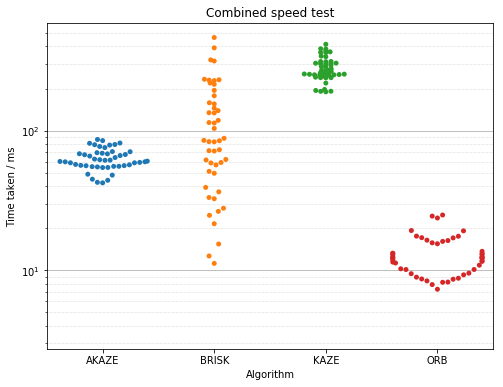

In [4]:
generate_plots(data);